# Decision Trees - CART


In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import random as rnd
from pylab import rcParams
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.datasets import load_boston
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston['MEDV'] = boston_dataset.target
names = boston_dataset.feature_names

print(boston.head())
print(names)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston.shape)

(506, 14)


In [8]:
array = boston.values

X = array[:,0:13]
Y = array[:,13]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [10]:
model = DecisionTreeRegressor(max_leaf_nodes = 20)

In [11]:
rt = model.fit(X_train, Y_train)
rt

DecisionTreeRegressor(max_leaf_nodes=20)

In [12]:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(max_leaf_nodes=20, presort=False)

In [13]:
rnd.seed(123458)
X_new = X[rnd.randrange(X.shape[0])]
X_new = X_new.reshape(1,13)
YHat = model.predict(X_new)


df = pd.DataFrame(X_new, columns = names)
df["Predicted Price"] = YHat
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Predicted Price
0,0.21161,0.0,8.56,0.0,0.52,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44,20.453333


In [14]:

YHat = model.predict(X_test)

r2 = r2_score(Y_test, YHat)
print("R-Squared = ", r2)

R-Squared =  0.8567122297482948


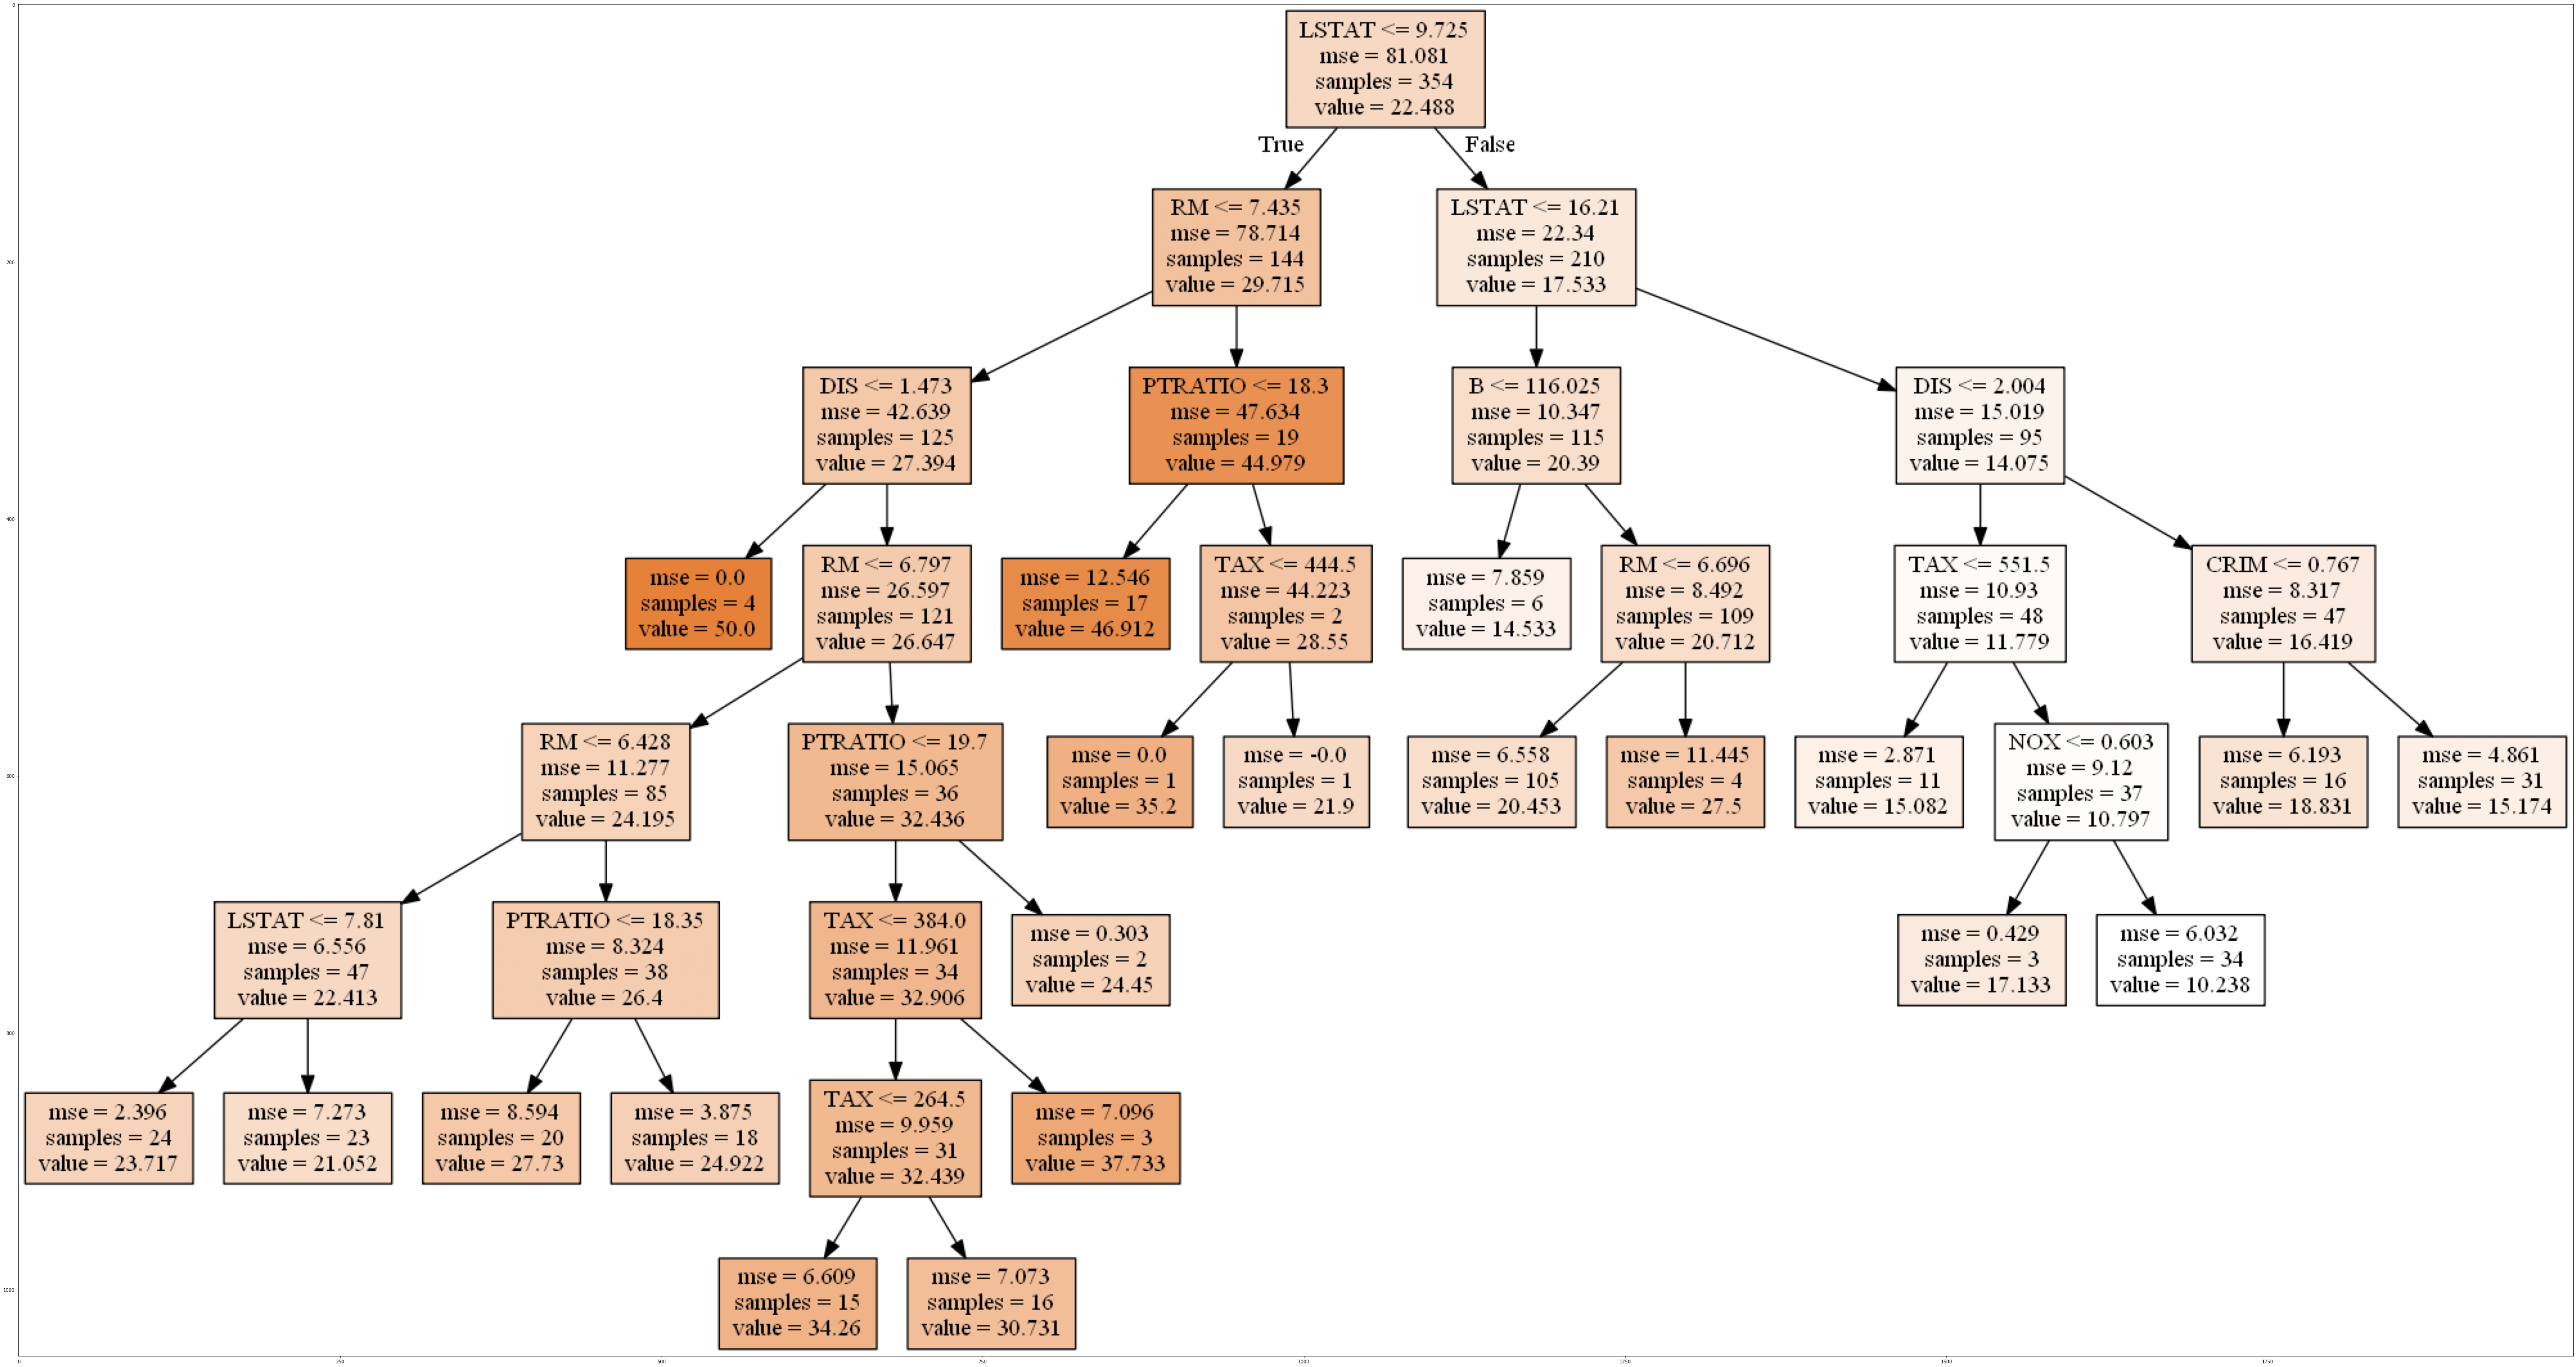

In [15]:
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys
str1 = "C:\ProgramData\Anaconda3\Library\bin\graphviz"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True, feature_names = names, class_names = 'MEDV')

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()